In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/default/Test.csv
/kaggle/input/default/Train.csv
/kaggle/input/default/SampleSubmission.csv


In [2]:
import matplotlib.pyplot as plt# for exploratory data analysis
%matplotlib inline
import seaborn as sns#for exploratory data analysis
from warnings import simplefilter
simplefilter(action ='ignore', category = FutureWarning)
print('Setup complete')
pd.set_option('display.max_columns', None)

Setup complete


In [3]:
df =pd.read_csv('/kaggle/input/default/Train.csv')
test = pd.read_csv('/kaggle/input/default/Test.csv')
sample_submission = pd.read_csv('/kaggle/input/default/SampleSubmission.csv')

In [4]:
df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [5]:
#
df['default_status'].value_counts()

no     42285
yes    13715
Name: default_status, dtype: int64

In [6]:
df.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [7]:
test.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50'],
      dtype='object')

In [8]:
df.shape,test.shape

((56000, 52), (24000, 51))

##Explorative Data Analysis

In [9]:
#Getting information of the types of columns in the training dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [10]:
#Getting information of the types of columns in the testing dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

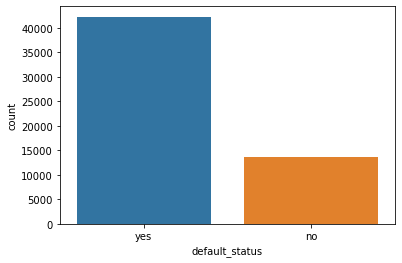

In [11]:
#Plotting a barchart to display the ratio of yes to no
g = sns.countplot(df['default_status'])
g.set_xticklabels(['yes','no'])
plt.show()

In [12]:
#Summary of all the columns in the training dataset
df.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

In [13]:
#Summary of all the columns in the testing dataset
test.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,22890.000000,22291.000000,23854.000000,23854.000000,23854.000000,1.839600e+04,2.176900e+04,1.839600e+04,2.060000e+04,2.385300e+04,1.060200e+04,1.981700e+04,2.153700e+04,2.400000e+04,1.440800e+04,18526.000000,19305.000000,19631.000000,24000.000000,23853.000000,17293.000000,15276.000000,11875.000000,18395.000000,21744.000000,20828.000000,20090.000000,23853.000000,23853.000000,13092.000000,7190.000000,21744.000000,23505.000000,23853.000000,14134.000000,23097.000000,21744.000000,23853.000000,22171.000000,5172.000000,7651.000000,23422.000000,23750.000000,21638.000000,10462.000000,17115.000000,1.507800e+04,23854.000000,1.920300e+04
mean,3492.284404,0.557676,1.065443,0.859146,2.183538,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,1.187478e+07,2.132302e+06,2.772047e+06,5.984000e+06,9.291862e+07,1.141483e+08,0.234265,0.267651,0.272477,0.938458,1.020459,87.114080,6653.189477,6473.026142,105.934375,2626.358030,10109.255617,6199.305027,17715.546221,16507.914099,5248.247174,10934.016134,946.711921,14.148066,0.229740,0.194071,12.777157,8.554544,8.506184,0.090749,147.623280,108.209648,0.369684,6.580480,0.566219,0.066526,0.097926,3.015440e+05,1.064118,6.749843e+05
std,190.502764,0.826543,2.198444,3.403115,11.415706,1.457540e+06,1.626022e+07,3.968185e+06,2.289125e+07,2.477113e+07,5.733605e+06,4.794095e+06,1.947650e+07,3.768364e+09,1.194017e+08,0.622532,0.701223,0.706765,1.705298,1.757307,53.179142,5701.118265,5929.962163,479.903878,1946.845869,8787.532233,5388.387561,27153.459422,9672.296721,3138.183322,6168.907825,1057.985881,15.511387,0.671496,0.558517,10.451113,9.469110,7.833898,0.408602,43.580328,36.426276,0.414077,6.363075,0.196060,0.278211,0.370392,1.868574e+06,1.816837,6.561031e+06
min,2986.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.811573e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.405000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.075000,0.000000,0.000000,0.000000,0.066432,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3356.000000,0.068675,0.000000,0.000000,0.000000,1.400400e+04,6.725810e+05,1.816630e+05,1.349441e+06,4.208980e+05,2.039332e+05,2.715220e+05,2.007240e+05,1.657646e+07,4.952544e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.545000,1140.933750,858.157500,14.730000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.500000,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,135.531750,87.499500,0.000000,2.020000,0.413268,0.000000,0.000000,7.272364e+01,0.000000,4.500510e-02
50%,3484.000000,0.273250,0.058200,0.000000,0.000000,1.155330e+05,2.719888e+06,9.594685e+05,5.529830e+06,3.651543e+06,6.727755e+05,1.149495e+06,1.563391e+06,2.814143e+07,8.326778e+07,0.000000,0.000000,0.000000,0.000000,0.000000,90.135000,5918.475000,5561.535000,60.690000,2212.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10677.000000,600.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,117.984000,0.220000,5.050000,0.592100,0.000000,0.000000,3.131754e+02,0.000000,1.680000e-01
75%,3624.000000,0.728850,1.304250,0.000000,0.000000,5.159112e+05,7.073576e+06,3.799849e+06,1.728658e+0

In [14]:
#Checking the correlation matrix between each columns in the training dataset
df.corr

<bound method DataFrame.corr of         Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0      Apcnt_1000000       3436.0      0.28505       1.6560       0.0000   
1      Apcnt_1000004       3456.0      0.67400       0.2342       0.0000   
2      Apcnt_1000008       3276.0      0.53845       3.1510       0.0000   
3      Apcnt_1000012       3372.0      0.17005       0.5050       0.0000   
4      Apcnt_1000016       3370.0      0.77270       1.1010       0.0000   
...              ...          ...          ...          ...          ...   
55995   Apcnt_999968       3740.0      0.01730       0.0000       0.0000   
55996   Apcnt_999972       3360.0      2.01145       0.6252       0.0000   
55997   Apcnt_999980       3500.0      0.76640       0.0000       0.0000   
55998   Apcnt_999988       3280.0      0.05235       2.0916       2.2212   
55999   Apcnt_999996       3522.0      0.46930       0.0000       0.0000   

       form_field5  form_field6  form_field7  form_fiel

In [15]:
#Checking the correlation matrix between each columns in the testing dataset
test.corr

<bound method DataFrame.corr of         Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0      Apcnt_1000032       3236.0      0.34875      10.2006       0.0000   
1      Apcnt_1000048       3284.0      1.27360       2.9606       9.0198   
2      Apcnt_1000052          NaN      0.27505       0.0600       0.0000   
3      Apcnt_1000076       3232.0      0.28505       2.8032       0.0000   
4      Apcnt_1000080       3466.0      2.09545       0.8318       2.5182   
...              ...          ...          ...          ...          ...   
23995   Apcnt_999940       3258.0      0.37925       0.5698       5.1282   
23996   Apcnt_999956       3514.0      0.95260       0.0000       0.0000   
23997   Apcnt_999976       3302.0      0.05755       4.2394       0.0000   
23998   Apcnt_999984       3334.0      0.75670       1.4428       0.0000   
23999   Apcnt_999992       3324.0      0.44840       2.3170       6.7176   

       form_field5  form_field6  form_field7  form_fiel

Text(0.5, 1.0, 'Default_Status Correlation Matrix')

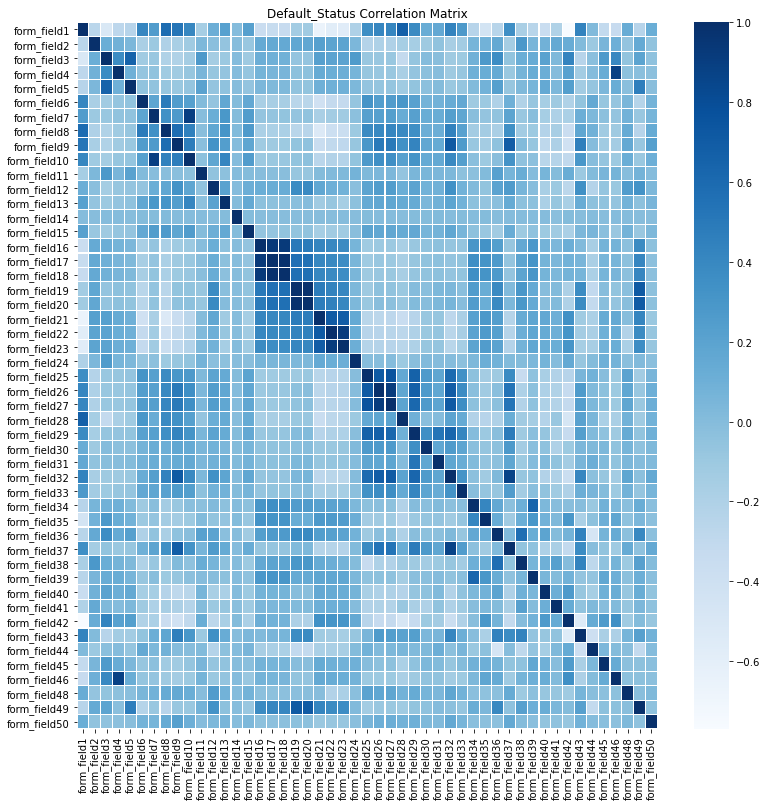

In [16]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),linewidths=.1,cmap='Blues')
plt.title('Default_Status Correlation Matrix')

In [17]:
#A tiny bit of feature engineering 
df['Monthly_income'] = df['form_field14'] /12
test['Monthly_income'] = test['form_field14'] /12

In [18]:
# replacing the columns with infinty values due to the feature engineering
df.replace([np.inf,-np.inf],np.nan, inplace =True)
test.replace([np.inf,-np.inf],np.nan, inplace =True)

## Dealing with missing values(nan)

In [19]:
#Checking the percentage of missing values in the whole training dataset
df.isnull().sum ()* 100 / len(df)

Applicant_ID       0.000000
form_field1        4.516071
form_field2        6.864286
form_field3        0.633929
form_field4        0.633929
form_field5        0.633929
form_field6       23.857143
form_field7        9.219643
form_field8       23.857143
form_field9       14.300000
form_field10       0.633929
form_field11      56.108929
form_field12      17.669643
form_field13      10.516071
form_field14       0.000000
form_field15      40.133929
form_field16      23.278571
form_field17      19.912500
form_field18      18.575000
form_field19       0.007143
form_field20       0.633929
form_field21      28.310714
form_field22      36.428571
form_field23      50.219643
form_field24      23.744643
form_field25       9.732143
form_field26      13.282143
form_field27      16.605357
form_field28       0.633929
form_field29       0.633929
form_field30      45.551786
form_field31      70.371429
form_field32       9.732143
form_field33       2.242857
form_field34       0.633929
form_field35      41

In [20]:
#Checking the percentage of missing values in the whole training dataset
test.isnull().sum ()* 100 / len(test)

Applicant_ID       0.000000
form_field1        4.625000
form_field2        7.120833
form_field3        0.608333
form_field4        0.608333
form_field5        0.608333
form_field6       23.350000
form_field7        9.295833
form_field8       23.350000
form_field9       14.166667
form_field10       0.612500
form_field11      55.825000
form_field12      17.429167
form_field13      10.262500
form_field14       0.000000
form_field15      39.966667
form_field16      22.808333
form_field17      19.562500
form_field18      18.204167
form_field19       0.000000
form_field20       0.612500
form_field21      27.945833
form_field22      36.350000
form_field23      50.520833
form_field24      23.354167
form_field25       9.400000
form_field26      13.216667
form_field27      16.291667
form_field28       0.612500
form_field29       0.612500
form_field30      45.450000
form_field31      70.041667
form_field32       9.400000
form_field33       2.062500
form_field34       0.612500
form_field35      41

In [21]:
#filling in the missing values with (-999)
df = df.fillna(-999)
test = test.fillna(-999)

In [22]:
#Data preprocessing converting Categorical features(dtype==object) to numeric values
from sklearn.preprocessing import LabelEncoder
df['form_field47']=LabelEncoder().fit_transform(df['form_field47'])
df['default_status']=LabelEncoder().fit_transform(df['default_status'])

test['form_field47']=LabelEncoder().fit_transform(test['form_field47'])

In [23]:
#Defining the feature columns(X) and the label(y) and dropping unncessary columns

df_features = df.drop(['Applicant_ID','default_status'], axis =1)
X = df_features
y = df.default_status

X_test = test.drop(['Applicant_ID'], axis = 1)

In [24]:
#creating a function to directly give out the rou_auc_score of the predict_proba of the training data and tht of the testing data.

def model_score(model):
    train_roc = roc_auc_score(y_train, model.predict_proba(x_train)[:,1])
    test_roc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    print('Train AUC: {} \t Val AUC: {}'.format(train_roc,test_roc))
    return test_roc

#CrossValidation,Ensembling and assigning weights and making predictions

In [25]:

from rgf.sklearn import RGFClassifier#Regularized Greedy Forest Classifier  an algorithm used to predict in classification problems
from sklearn.model_selection import StratifiedKFold#Cross Validation( to prevent overfitting and to give a more accurate prediction )
from sklearn.ensemble import RandomForestClassifier, VotingClassifier#Voting Classifier (for ensembling of the the best models with the best parameters)
from sklearn.preprocessing import MinMaxScaler# MinMaxScaler(For data preprocessing)
from catboost import CatBoostClassifier# for making prediction
from lightgbm import LGBMClassifier#for making prediction
from sklearn.metrics import roc_auc_score# for evaluation and validation of the model
from sklearn.pipeline import Pipeline# for making pipeline
#Defining all the models to be used
clf = RandomForestClassifier(n_jobs=-1,random_state = 419)
cbt = CatBoostClassifier(verbose=False, thread_count=-1,)
rgf =RGFClassifier(verbose=False)
scale= MinMaxScaler()

In [26]:
#Defining  all my models under Model_classifiers. Most of the parameters where manually tuned
 model_classifiers = (('cbt',CatBoostClassifier(verbose=False,random_state= 419)),
('cbt1',CatBoostClassifier(bagging_temperature=0.8609, border_count=116,thread_count=-1, random_strength=0.0882067, depth=5, 
                                                               l2_leaf_reg=3, iterations=270, scale_pos_weight=0.390675, 
                                                              verbose=False,learning_rate=0.070856,random_state=419)),
('rgf',RGFClassifier( algorithm ='RGF_Sib',max_leaf =1000)),
('clf', RandomForestClassifier(n_estimators=700)))

In [27]:
#Using StratifiedKfold to split the data into 20 splits and cross validate each fold or split
skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=419)
scores,preds = [],[]


model= VotingClassifier(estimators= model_classifiers, voting='soft',weights=[3,1,1,1])#the ensembled model is used to carry out the prediction probability with weights assigned to each algorithm to imcrease accuracy

j = 1
for train_split, test_split in skf.split(X, y):#Creating a cross validation for loop using StratifiedKFold
    pipe = Pipeline([('preprocessor', scale), ('model', model)])
    x_train, x_test, y_train, y_test = X.iloc[train_split], X.iloc[test_split], y.iloc[train_split], y.iloc[test_split]# splitting of the dataset for training and validation
    pipe.fit(x_train, y_train)
    print('Number of splits trained {}'.format(j))
    score = model_score(pipe)
    pred = pipe.predict_proba(X_test)[:, 1]#prediction probality of the test data
    scores.append(score)
    preds.append(pred)
    j += 1

np.mean(scores)

Number of splits trained 1
Train AUC: 0.9501043626750547 	 Val AUC: 0.8346568652827389
Number of splits trained 2
Train AUC: 0.9494884614524878 	 Val AUC: 0.8415399216579524
Number of splits trained 3
Train AUC: 0.9495934641549317 	 Val AUC: 0.8426146226984866
Number of splits trained 4
Train AUC: 0.9493866149448115 	 Val AUC: 0.8483173715725355
Number of splits trained 5
Train AUC: 0.9492859797128512 	 Val AUC: 0.8456640955289815
Number of splits trained 6
Train AUC: 0.9493375142778168 	 Val AUC: 0.8507603068257983
Number of splits trained 7
Train AUC: 0.9493427417576491 	 Val AUC: 0.8419622342787634
Number of splits trained 8
Train AUC: 0.9494655263935867 	 Val AUC: 0.8521518351900835
Number of splits trained 9
Train AUC: 0.9495125813545896 	 Val AUC: 0.8418532840896867
Number of splits trained 10
Train AUC: 0.9495652000660566 	 Val AUC: 0.840368665373975
Number of splits trained 11
Train AUC: 0.9492625564968337 	 Val AUC: 0.8514574501242583
Number of splits trained 12
Train AUC: 0.9

0.8418477704178468

In [28]:
#Final result is the average mean of the rou_auc_score  of each split carried out on the test data
predict = np.mean(preds, axis=0)

In [29]:
#Prediction or Result conversion to csv file and submission

In [30]:
sample_submission.default_status = predict

In [31]:
#Converting result to csv file
sample_submission.to_csv('predict31.csv', index=False)